In [1]:
import nltk

# Basics

In [2]:
text = "Python is an interpreted high-level programming language for general-purpose programming. Created by Guido van Rossum and first released in 1991."

In [3]:
# sentence tokenizer
sentences = nltk.sent_tokenize(text)
len(sentences)

2

In [4]:
# word tokenizer
words = nltk.word_tokenize(text)
len(words)

22

In [5]:
words[:5]

['Python', 'is', 'an', 'interpreted', 'high-level']

In [6]:
# frequency of words
wordfreq = nltk.FreqDist(words)
wordfreq.most_common(2)

[('programming', 2), ('.', 2)]

In [7]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


**Searching for a pattern in a text**
- There are multiple ways of searching for a pattern in a text.
- The example shown below searches for words starting with tri, and ending with r.



In [8]:
text1.findall("<tri.*r>")

triangular; triangular; triangular; triangular


# Basic Tasks with Text

**Determining Total Word Count**

NLTK Book module consits of 9 text class. Type the name of the text or sentence to view it.
- text1: Moby Dick by Herman Melville 1851 
- text2: Sense and Sensibility by Jane Austen 1811 
- text3: The Book of Genesis 
- text4: Inaugural Address Corpus 
- text5: Chat Corpus 
- text6: Monty Python and the Holy Grail 
- text7: Wall Street Journal 
- text8: Personals Corpus 
- text9: The Man Who Was Thursday by G . K . Chesterton 1908

In [9]:
type(text1)

nltk.text.Text

In [10]:
n_words = len(text1)
n_words

260819

**Determining Unique Word Count**

In [11]:
# A unique number of words in text1 is determined using set and len methods.
n_unique_words = len(set(text1))
n_unique_words

19317

**Transforming Words**
- It is possible to apply a function to any number of words and transform them.
- Now let's transform every word of text1 to lowercase and determine unique words once again.

In [12]:
text1_lcw = [ word.lower() for word in set(text1) ]
n_unique_words_lc = len(set(text1_lcw))
n_unique_words_lc

17231

**Determining Word Coverage**
Word Coverage refers to an average number of times a word is occurring in the text.

The following examples determine Word Coverage of raw and transformed text1.

In [13]:
word_coverage1 = n_words / n_unique_words
word_coverage1

13.502044830977896

In [14]:
# On average, a single word in text1 is repeated 13.5 times.

word_coverage2 = n_words / n_unique_words_lc
word_coverage2

15.136614241773549

**Filtering Words**

In [15]:
big_words = [word for word in set(text1) if len(word) > 17]
big_words

['characteristically', 'uninterpenetratingly']

In [16]:
sun_words = [word for word in set(text1) if word.startswith('Sun') ]
sun_words

['Sunset', 'Sunda', 'Sunday']

**Frequency Distribution**

- FreqDist functionality of nltk can be used to determine the frequency of all words, present in an input text.

- The following example, determines frequency distribution of text1 and further displays the frequency of word Sunday.

In [17]:
text1_freq = nltk.FreqDist(text1)
text1_freq['Sunday']

7

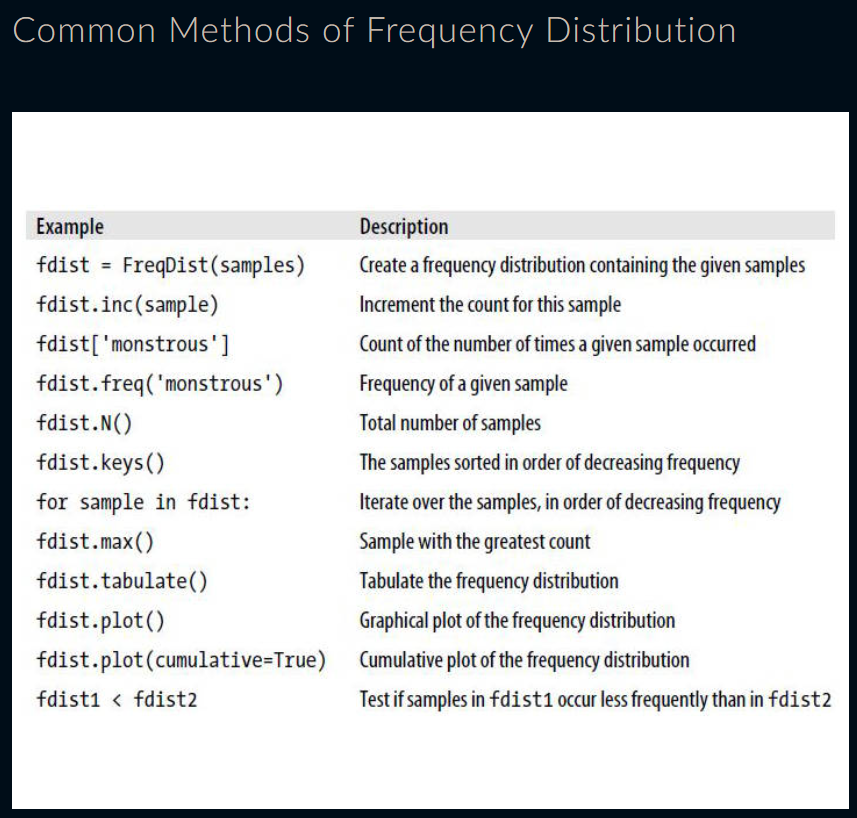

In [18]:
top3_text1 = text1_freq.most_common(3)
top3_text1

[(',', 18713), ('the', 13721), ('.', 6862)]

In [19]:
large_uncommon_words = [word for word in text1 if word.isalpha() and len(word) > 7 ]
text1_uncommon_freq = nltk.FreqDist(large_uncommon_words)
text1_uncommon_freq.most_common(3)

[('Queequeg', 252), ('Starbuck', 196), ('something', 119)]

# Text Corpora

Two popular Text Corpora available from nltk:

- Genesis: It is a collection of few words across multiple languages.

- Brown: It is the first electronic corpus of one million English words.

Other Corpus in nltk

- Gutenberg : Collections from Project Gutenberg
- Inaugural : Collection of U.S Presidents inaugural speeches
- stopwords : Collection of stop words.
- reuters : Collection of news articles.
- cmudict : Collection of CMU Dictionary words.
- movie_reviews : Collection of Movie Reviews.
- np_chat : Collection of chat text.
- names : Collection of names associated with males and females.
- state_union : Collection of state union address.
- wordnet : Collection of all lexical entries.
- words : Collection of words in Wordlist corpus.

In [20]:
from nltk.corpus import genesis
# Various text collections available under genesis text corpus are viewed by fileids method.

genesis.fileids()

['english-kjv.txt',
 'english-web.txt',
 'finnish.txt',
 'french.txt',
 'german.txt',
 'lolcat.txt',
 'portuguese.txt',
 'swedish.txt']

In [21]:
for fileid in genesis.fileids():
    n_chars = len(genesis.raw(fileid))
    n_words = len(genesis.words(fileid))
    n_sents = len(genesis.sents(fileid))
    print(int(n_chars/n_words), int(n_words/n_sents), fileid)

4 30 english-kjv.txt
4 19 english-web.txt
5 15 finnish.txt
4 23 french.txt
4 23 german.txt
4 20 lolcat.txt
4 27 portuguese.txt
4 30 swedish.txt


The methods raw, words and sents used in code determine the total number of characters, words, and sentences present in a specific text collection.

**Text Corpus Structure**

A text corpus is organized into any of the following four structures.

- Isolated - Holds Individual text collections.

- Categorized - Each text collection tagged to a category.

- Overlapping - Each text collection tagged to one or more categories, and

- Temporal - Each text collection tagged to a period, date, time, etc.

**Isolated Text Corpus**

genesis text corpus has eight text collections, which are isolated in structure.

**Categorized Text Corpus**

Each text collection is tagged to a specific category or genre.

E.g.: Brown text corpus contains 500 collections, which are categorized into 15 genres

**Overlapping Text Corpus**

Each collection is categorized into one or more genre.

E.g.: Reuters corpus contains 10788 collections, which are tagged to 90 genre.

**Temporal Text Corpus**

Each text collection is tagged to a period of time.

E.g.: inaugural corpus contain text collections corresponding to U.S inaugural presidential speeches, gathered over a period of time.

In [22]:
# Loading User Specific Corpus
# Now let's see how to convert your collection of text files into a text corpus.

# Suppose, you have three files text1.txt, text2.txt and text3.txt in C:/Users/Vaibhav/Downloads/files  path.

from nltk.corpus import PlaintextCorpusReader
corpus_root = 'C:/Users/Vaibhav/Downloads/files'
wordlists = PlaintextCorpusReader(corpus_root, '.*')
wordlists.fileids()

['text1.txt', 'text2.txt', 'text3.txt']

# Conditional frequency distribution

A Conditional Frequency is a collection of frequency distributions, computed based on a condition.

For computing a conditional frequency, you have to attach a condition to every occurrence of an event.

In [23]:
c_items = [('F','apple'), ('F','apple'), ('F','kiwi'), ('V','cabbage'), ('V','cabbage'), ('V','potato') ]

ConditionalFreqDist function of nltk is used to compute Conditional Frequency Distribution (CDF).

In [24]:
cfd = nltk.ConditionalFreqDist(c_items)
cfd.conditions()

['F', 'V']

In [25]:
cfd['F']

FreqDist({'apple': 2, 'kiwi': 1})

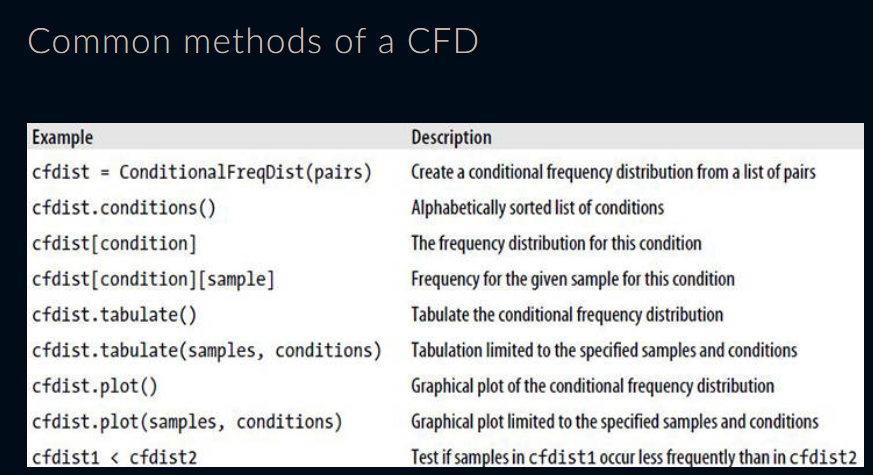

In [26]:
from nltk.corpus import brown
cfd = nltk.ConditionalFreqDist([(genre, word) for genre in brown.categories() for word in brown.words(categories=genre) ])

In [27]:
cfd.conditions()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

**Viewing Word Count**

Once after computing conditional frequency distribution, tabulate method is used for viewing the count along with arguments conditions and samples.

In [28]:
cfd.tabulate(conditions=['government', 'humor', 'reviews'], samples=['leadership', 'worship', 'hardship'])

           leadership    worship   hardship 
government         12          3          2 
     humor          1          0          0 
   reviews         14          1          2 


**Viewing Cumulative Word Count**

The cumulative count for different conditions is found by setting cumulative argument value to True.

In [29]:
cfd.tabulate(conditions=['government', 'humor', 'reviews'], samples=['leadership', 'worship', 'hardship'], cumulative = True)

           leadership    worship   hardship 
government         12         15         17 
     humor          1          1          1 
   reviews         14         15         17 


**Accessing Individual Frequency Distributions**

From the obtained conditional frequency distribution, you can access individual frequency distributions.

In [30]:
news_fd = cfd['news']
news_fd.most_common(3)

[('the', 5580), (',', 5188), ('.', 4030)]

In [31]:
# You can further access count of any sample
news_fd['the']

5580

**Comparing Frequency Distributions**

In [32]:
from nltk.corpus import names
nt = [(fid.split('.')[0], name[-1])    for fid in names.fileids()   for name in names.words(fid) ]
cfd2 = nltk.ConditionalFreqDist(nt)
sum([cfd2['female'][x] for x in cfd2['female']]) > sum([cfd2['male'][x] for x in cfd2['male']])

True

In [33]:
# The following code snippet displays frequency count of characters a and e in females and males, respectively.
cfd2.tabulate(samples=['a', 'e'])

          a    e 
female 1773 1432 
  male   29  468 


In [34]:
def cfd_calc(cfdconditions, cfdevents):
    import nltk
    from nltk.corpus import brown
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
    
    dct = dict()
    for cond in cfdconditions:
        dct[cond] = [w.lower() for w in brown.words(categories=cond) if not w.lower() in stop_words]
        
    cdev_cfd = nltk.ConditionalFreqDist([(genre, word) for genre in cfdconditions for word in dct[genre] ])

    
    
    dct2 = dict()
    for cond in cfdconditions:
        lst = ['ing' for word in dct[cond] if word.endswith('ing')]
        lst2 = ['ed' for word in dct[cond] if word.endswith('ed')]
        dct2[cond] = lst + lst2
    
    inged_cfd = nltk.ConditionalFreqDist([(cond, word) for cond in cfdconditions for word in dct2[cond]])

    cdev_cfd.tabulate(conditions = cfdconditions, samples = cfdevents)
    inged_cfd.tabulate(conditions = cfdconditions, samples = ['ed','ing']) 
    
cfd_calc(['government', 'hobbies'],['first','last'])    

           first  last 
government    62    21 
   hobbies   126    26 
             ed  ing 
government 2507 1474 
   hobbies 2561 2169 


# Processing Raw Text

Raw Text Processing

For most of the NLTK studies that you carry out, data is not readily available in the form of a text corpus.

Also, raw text data from a different source can be obtained, processed and used for doing NLTK studies.

In [35]:
# The following example reads content from a text file, available at Project Gutenberg site.
from urllib import request
url = "http://www.gutenberg.org/files/2554/2554-0.txt"
content1 = request.urlopen(url).read()

In [36]:
# The following example reads content from a news article available over the web.
# Beautifulsoup module is used for scrapping the required text from the webpage.

from urllib import request
url = "http://www.bbc.com/news/health-42802191"
html_content = request.urlopen(url).read()

from bs4 import BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

In [37]:
# find_all method returns all inner elements of div element, having class attribute value as story-body__inner.

inner_body = soup.find_all('div', attrs={'class':'ssrcss-181c4hk-SectionWrapper eustbbg3'})

inner_text = [elm.text for elm in inner_body[0].find_all(['h1', 'h2', 'p', 'li']) ]
 
text_content2 = '\n'.join(inner_text)

Reading from Other Sources
You can also read text from some other text resources such as RSS feeds, FTP repositories, local text files, etc.

It is also possible to read a text in binary format, from sources like Microsoft Word and PDF.

Third party libraries such as pywin32, pypdf are required for accessing Microsoft Word or PDF documents.

**Tokenization**
Tokenization is a step in which a text is broken down into words and punctuation.
The simplest way of tokenizing is by using word_tokenize method.

The below example tokenizes text read from Project Gutenberg.

In [38]:
text_content1 = content1.decode('unicode_escape')  # Converts bytes to unicode
tokens1 = nltk.word_tokenize(text_content1)
tokens1[3:8]

['Project', 'Gutenberg', 'eBook', 'of', 'Crime']

In [39]:
# The following example tokenizes text scrapped from the HTML page.

tokens2 = nltk.word_tokenize(text_content2)
tokens2[:5]

['Skip', 'to', 'content', 'Accessibility', 'Help']

Regular Expressions for Tokenization
Regular expressions can also be utilized to split the text into tokens.

The below example splits the entire text text_content2 with regular expression \w+

In [40]:
import re
tokens2_2 = re.findall(r'\w+', text_content2)
len(tokens2_2)

1217

***Regular Expressions for Tokenization***

nltk contains the function regexp_tokenize, which can be used similarly to re.findall and produce the tokens.

In [41]:
pattern = r'\w+'
tokens2_3 = nltk.regexp_tokenize(text_content2, pattern)
len(tokens2_3)

1217

**Creation of NLTK text**

Using the obtained list of tokens, an object of NLTK text can be created as shown below.

In [42]:
input_text2 = nltk.Text(tokens2)
type(input_text2)

nltk.text.Text

In [43]:
#exercise

def processRawText(textURL):

    from urllib import request
    import nltk
    
    url = textURL
    
    textcontent = request.urlopen(url).read().decode('unicode_escape')
    lst = nltk.word_tokenize(textcontent)
    tokenizedlcwords = [wrd.lower() for wrd in lst]
    
    noofwords = len(tokenizedlcwords)
    
    noofunqwords = len(set(tokenizedlcwords))
    
    wordcov =  noofwords / noofunqwords
    
    alp =  [wrd for wrd in tokenizedlcwords if wrd.isalpha()]
    
    wordfreq = nltk.FreqDist(alp)
    maxfreq = wordfreq.most_common(1)
    
    return noofwords, noofunqwords, int(wordcov), maxfreq[0][0]

processRawText('https://hrcdn.net/s3_pub/istreet-assets/2KDELtu3svGwJgNXUXFE7Q/001.txt')

(210, 127, 1, 'the')

# Bigrams, Ngrams and   Collocation

Bigrams represent a set of two consecutive words appearing in a text.

In [44]:
import nltk
s = 'Python is an awesome language.'
tokens = nltk.word_tokenize(s)
list(nltk.bigrams(tokens))

[('Python', 'is'),
 ('is', 'an'),
 ('an', 'awesome'),
 ('awesome', 'language'),
 ('language', '.')]

let's find out three frequently occurring bigrams, present in english-kjv collection of genesis corpus.

Let's consider only those bigrams, whose words are having a length greater than 5.

In [45]:
from nltk.corpus import genesis
eng_tokens = genesis.words('english-kjv.txt')
eng_bigrams = nltk.bigrams(eng_tokens)
filtered_bigrams = [ (w1, w2) for w1, w2 in eng_bigrams if len(w1) >=5 and len(w2) >= 5 ]
filtered_bigrams[:5]

[('called', 'Night'),
 ('waters', 'which'),
 ('waters', 'which'),
 ('firmament', 'Heaven'),
 ('waters', 'under')]

In [46]:
eng_bifreq = nltk.FreqDist(filtered_bigrams)
eng_bifreq.most_common(3)

[(('their', 'father'), 19), (('lived', 'after'), 16), (('seven', 'years'), 15)]

**Determining Frequent After Words**

Now let's see an example which determines the two most frequent words occurring after living are determined.

In [47]:
from nltk.corpus import genesis
eng_tokens = genesis.words('english-kjv.txt')
eng_bigrams = nltk.bigrams(eng_tokens)
eng_cfd = nltk.ConditionalFreqDist(eng_bigrams)
eng_cfd['living'].most_common(2)

[('creature', 7), ('thing', 4)]

**Generating Frequent Next Word**

Now let's define a function named generate, which returns words occurring frequently after a given word.

In [48]:
def generate(cfd, word, n=5):
    n_words = []
    for i in range(n):
        n_words.append(word)
        word = cfd[word].max()
    return n_words

generate(eng_cfd, 'living')

['living', 'creature', 'that', 'he', 'said']

The output shows a word which occurs most frequently next to living is creature.
Similarly that occurs more frequently after creature and so on.

**Trigrams**

Similar to Bigrams, Trigrams refers to set of all three consecutive words appearing in text.

In [49]:
s = 'Python is an awesome language.'
tokens = nltk.word_tokenize(s)
list(nltk.trigrams(tokens))

[('Python', 'is', 'an'),
 ('is', 'an', 'awesome'),
 ('an', 'awesome', 'language'),
 ('awesome', 'language', '.')]

**ngrams**


nltk also provides the function ngrams. It can be used to determine a set of all possible n consecutive words appearing in a text.

The following example displays a list of four consecutive words appearing in the text s.

In [50]:
list(nltk.ngrams(tokens, 4))

[('Python', 'is', 'an', 'awesome'),
 ('is', 'an', 'awesome', 'language'),
 ('an', 'awesome', 'language', '.')]

***Collocations**

A collocation is a pair of words that occur together, very often.

For example, red wine is a collocation.

One characteristic of a collocation is that the words in it cannot be substituted with words having similar senses.

For example, the combination maroon wine sounds odd.

In [51]:
from nltk.corpus import genesis
tokens = genesis.words('english-kjv.txt')
gen_text = nltk.Text(tokens)
gen_text.collocations()

said unto; pray thee; thou shalt; thou hast; thy seed; years old;
spake unto; thou art; LORD God; every living; God hath; begat sons;
seven years; shalt thou; little ones; living creature; creeping thing;
savoury meat; thirty years; every beast


In [52]:
# exercise

def performBigramsAndCollocations(textcontent, word):

    import nltk
    from nltk.corpus import stopwords
    
    stop_words = set(stopwords.words('english'))
    
    pattern = r'\w+'
    tokenizedwords = nltk.regexp_tokenize(textcontent, pattern)
    
    tokenizedwords = [wrd.lower() for wrd in tokenizedwords]
    
    tokenizedwordsbigrams = nltk.bigrams(tokenizedwords)
    
    tokenizednonstopwordsbigrams = [tup for tup in tokenizedwordsbigrams if (tup[0] not in stop_words and tup[1] not in stop_words)]
    
    cfd_bigrams = nltk.ConditionalFreqDist(tokenizednonstopwordsbigrams)
    
    mostfrequentwordafter = cfd_bigrams[word].most_common(3)
    
    gt = nltk.Text(tokenizedwords)
    
    collocationwords = gt.collocation_list()
    
    lst = []
    for i in collocationwords:
        j = i[0]+ " " + i[1]
        lst.append(j)    
    return mostfrequentwordafter, lst

x = 'Thirty-five sports disciplines and four cultural activities will be offered during seven days of competitions. He skated with charisma, changing from one gear to another, from one direction to another, faster than a sports car. Armchair sports fans settling down to watch the Olympic Games could be for the high jump if they do not pay their TV licence fee. Such invitationals will attract more viewership for sports fans by sparking interest among sports fans. She barely noticed a flashy sports car almost run them over, until Eddie lunged forward and grabbed her body away. And he flatters the mother and she kind of gets prissy and he talks her into going for a ride in the sports car.'
y = 'sports'

performBigramsAndCollocations(x, y)

([('car', 3), ('fans', 3), ('disciplines', 1)], ['sports car', 'sports fans'])

# Stemming
Stemming is a process of stripping affixes from words.

More often, you normalize text by converting all the words into lowercase. This will treat both words The and the as same.

With stemming, the words playing, played and play will be treated as single word, i.e. play.

**Stemmers in nltk**

nltk comes with few stemmers.

The two widely used stemmers are Porter and Lancaster stemmers.

These stemmers have their own rules for string affixes.



In [53]:
from nltk import PorterStemmer
porter = nltk.PorterStemmer()
porter.stem('builders')

'builder'

In [54]:
from nltk import LancasterStemmer
lancaster = LancasterStemmer()
lancaster.stem('builders')

'build'

Normalizing with Stemming

Let's consider the text collection, text1.

Let's first determine the number of unique words present in original text1.

Then normalize the text by converting all the words into lower case and again determine the number of unique words.

In [55]:
from nltk.book import *
len(set(text1))

19317

In [56]:
lc_words = [ word.lower() for word in text1] 
len(set(lc_words))

17231

In [57]:
from nltk import PorterStemmer
porter = PorterStemmer()
p_stem_words = [porter.stem(word) for word in set(lc_words) ]
len(set(p_stem_words))

10927

In [58]:
from nltk import LancasterStemmer
lancaster = LancasterStemmer()
l_stem_words = [lancaster.stem(word) for word in set(lc_words) ]
len(set(l_stem_words))

9036

**Understanding Lemma**

Lemma is a lexical entry in a lexical resource such as word dictionary.

You can find multiple Lemma's with the same spelling. These are known as homonyms.

For example, consider the two Lemma's listed below, which are homonyms.

1. saw [verb] - Past tense of see
2. saw [noun] - Cutting instrument

nltk comes with WordNetLemmatizer. This lemmatizer removes affixes only if the resulting word is found in lexical resource, Wordnet.

In [59]:
wnl = nltk.WordNetLemmatizer()
wnl_stem_words = [wnl.lemmatize(word) for word in set(lc_words) ]
len(set(wnl_stem_words))

15168

In [60]:
# exercise

def performStemAndLemma(textcontent):
    # Write your code here
    import nltk
    from nltk.corpus import stopwords
    from nltk import PorterStemmer
    from nltk import LancasterStemmer
    from nltk import WordNetLemmatizer
    
    stop_words = set(stopwords.words('english'))
    
    pattern = r'\w+'
    tokenizedwords = nltk.regexp_tokenize(textcontent, pattern)
    
    tokenizedwords = [wrd.lower() for wrd in set(tokenizedwords)]
    filteredwords = [wrd for wrd in tokenizedwords if wrd not in stop_words]
    
    porter = PorterStemmer()
    porterstemmedwords = [porter.stem(word) for word in filteredwords ]
    
    lancaster = LancasterStemmer()
    lancasterstemmedwords = [lancaster.stem(word) for word in filteredwords ]
    
    wnl = WordNetLemmatizer()
    lemmatizedwords = [wnl.lemmatize(word) for word in filteredwords ]
    
    return porterstemmedwords, lancasterstemmedwords, lemmatizedwords

x = '"Explain to me again why I shouldn\'t cheat?" he asked. "All the others do and nobody ever gets punished for doing so. I should go about being happy losing to cheaters because I know that I don\'t? That\'s what you\'re telling me?'
performStemAndLemma(x)

(['other',
  'cheater',
  'punish',
  'get',
  'nobodi',
  'happi',
  'ever',
  'ask',
  'lose',
  'go',
  'cheat',
  'explain',
  'know',
  'tell'],
 ['oth',
  'che',
  'pun',
  'get',
  'nobody',
  'happy',
  'ev',
  'ask',
  'los',
  'go',
  'che',
  'explain',
  'know',
  'tel'],
 ['others',
  'cheater',
  'punished',
  'get',
  'nobody',
  'happy',
  'ever',
  'asked',
  'losing',
  'go',
  'cheat',
  'explain',
  'know',
  'telling'])

# POS Tagging

The method of categorizing words into their parts of speech and then labeling them respectively is called POS Tagging.

**POS Tagger**

A POS Tagger processes a sequence of words and tags a part of speech to each word.

pos_tag is the simplest tagger available in nltk.

The below example shows usage of pos_tag

In [61]:
import nltk
text = 'Python is awesome.'
words = nltk.word_tokenize(text)
nltk.pos_tag(words)

[('Python', 'NNP'), ('is', 'VBZ'), ('awesome', 'JJ'), ('.', '.')]

**POS_Tagger**

The words **Python, is** and **awesome** are tagged to Proper Noun (NNP), Present Tense Verb (VB), and adjective (JJ) respectively.

In [62]:
# read more about the pos tags with the below help command

nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [63]:
# To know about a specific tag like JJ, use the below-shown expression
nltk.help.upenn_tagset('JJ')

JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...


**Tagging Text**

Constructing a list of tagged words from a string is possible.

A tagged word or token is represented in a tuple, having the word and the tag.

In the input text, each word and tag are separated by /.

In [64]:
text = 'Python/NN is/VB awesome/JJ ./.'
[ nltk.tag.str2tuple(word) for word in text.split() ]

[('Python', 'NN'), ('is', 'VB'), ('awesome', 'JJ'), ('.', '.')]

**Tagged Corpora**


Many of the text corpus available in nltk, are already tagged to their respective parts of speech.

tagged_words method can be used to obtain tagged words of a corpus.

The following example fetches tagged words of brown corpus and displays few.

In [65]:
from nltk.corpus import brown
brown_tagged = brown.tagged_words()
brown_tagged[:3]

[('The', 'AT'), ('Fulton', 'NP-TL'), ('County', 'NN-TL')]

**DefaultTagger**

DefaultTagger assigns a specified tag to every word or token of given text.

An example of tagging NN tag to all words of a sentence, is shown below.

In [66]:
import nltk
text = 'Python is awesome.'
words = nltk.word_tokenize(text)
default_tagger = nltk.DefaultTagger('NN')
default_tagger.tag(words)

[('Python', 'NN'), ('is', 'NN'), ('awesome', 'NN'), ('.', 'NN')]

**Lookup Tagger**

You can define a custom tagger and use it to tag words present in any text.

The below-shown example defines a dictionary defined_tags, with three words and their respective tags.

In [67]:
import nltk
text = 'Python is awesome.'
words = nltk.word_tokenize(text)
defined_tags = {'is':'BEZ', 'over':'IN', 'who': 'WPS'}

The example further defines a UnigramTagger with the defined dictionary and uses it to predict tags of words in text.

In [68]:
baseline_tagger = nltk.UnigramTagger(model=defined_tags)
baseline_tagger.tag(words)

[('Python', None), ('is', 'BEZ'), ('awesome', None), ('.', None)]

Since the words Python and awesome are not found in defined_tags dictionary, they are tagged to None.

**Unigram Tagger**

UnigramTagger provides you the flexibility to create your taggers.

Unigram taggers are built based on statistical information. i.e., they tag each word or token to most likely tag for that particular word.

You can build a unigram tagger through a process known as training.

Then use the tagger to tag words in a test set and evaluate the performance.

Let's consider the tagged sentences of brown corpus collections, associated with government genre.

Let's also compute the training set size, i.e., 80%.

In [69]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='government')
brown_sents = brown.sents(categories='government')
len(brown_sents)

3032

In [70]:
train_size = int(len(brown_sents)*0.8)
train_size

2425

In [71]:
train_sents = brown_tagged_sents[:train_size]
test_sents = brown_tagged_sents[train_size:]
unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.evaluate(test_sents)

0.7799495586380832

unigram_tagger is built by passing trained tagged sentences as argument to UnigramTagger.

The built unigram_tagger is further evaluated with test sentences.

The following code snippet shows tagging words of a sentence, taken from the test set.

In [72]:
unigram_tagger.tag(brown_sents[3000])

[('The', 'AT'),
 ('first', 'OD'),
 ('step', 'NN'),
 ('is', 'BEZ'),
 ('a', 'AT'),
 ('comprehensive', 'JJ'),
 ('self', None),
 ('study', 'NN'),
 ('made', 'VBN'),
 ('by', 'IN'),
 ('faculty', None),
 (',', ','),
 ('by', 'IN'),
 ('outside', 'IN'),
 ('consultants', 'NNS'),
 (',', ','),
 ('or', 'CC'),
 ('by', 'IN'),
 ('a', 'AT'),
 ('combination', 'NN'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('two', 'CD'),
 ('.', '.')]